Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load and Inspect the Dataset

In [6]:
df = pd.read_csv('/content/EUR_INR Historical Data.csv')
print(df.head())
print(df.info())

         Date     Price      Open      High       Low Vol. Change %
0  17-07-2025   99.6990   99.9300   99.9300   99.6820  NaN   -0.23%
1  16-07-2025   99.9260   99.7485  100.6830   99.4985  NaN    0.17%
2  15-07-2025   99.7575  100.3555  100.4535   99.6800  NaN   -0.57%
3  14-07-2025  100.3340  100.0505  100.6135   99.9860  NaN    0.10%
4  13-07-2025  100.2380  100.2380  100.2380  100.2380  NaN   -0.09%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1186 non-null   object 
 1   Price     1186 non-null   float64
 2   Open      1186 non-null   float64
 3   High      1186 non-null   float64
 4   Low       1186 non-null   float64
 5   Vol.      539 non-null    object 
 6   Change %  1186 non-null   object 
dtypes: float64(4), object(3)
memory usage: 65.0+ KB
None


Preprocess the Data

In [7]:
# Clean column names
df.columns = [col.strip().replace(' ', '_') for col in df.columns]

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Remove commas and convert to float
# for col in ['Price', 'Open', 'High', 'Low']:
#     df[col] = df[col].str.replace(',', '').astype(float)

# Drop 'Change_%' as it might be non-numeric (or extract number)
df['Change_%'] = df['Change_%'].str.replace('%', '').str.replace(',', '')
df['Change_%'] = pd.to_numeric(df['Change_%'], errors='coerce')

# Sort by date
df = df.sort_values(by='Date')
df.reset_index(drop=True, inplace=True)

print(df.describe())

                                Date        Price         Open         High  \
count                           1186  1186.000000  1186.000000  1186.000000   
mean   2023-04-11 07:04:57.470489088    88.340876    88.352828    88.689259   
min              2021-01-01 00:00:00    78.371000    78.371000    78.680000   
25%              2022-02-21 06:00:00    86.289750    86.324500    86.567750   
50%              2023-04-11 12:00:00    88.763000    88.795000    89.087250   
75%              2024-05-29 18:00:00    90.379500    90.397500    90.679500   
max              2025-07-17 00:00:00   101.099000   101.099000   101.199000   
std                              NaN     4.185891     4.171423     4.166209   

               Low     Change_%  
count  1186.000000  1186.000000  
mean     88.047329     0.010396  
min      77.716000    -2.030000  
25%      86.016375    -0.260000  
50%      88.549250     0.000000  
75%      90.127375     0.290000  
max     100.657500     1.760000  
std       4.1942

Visualize the Trends

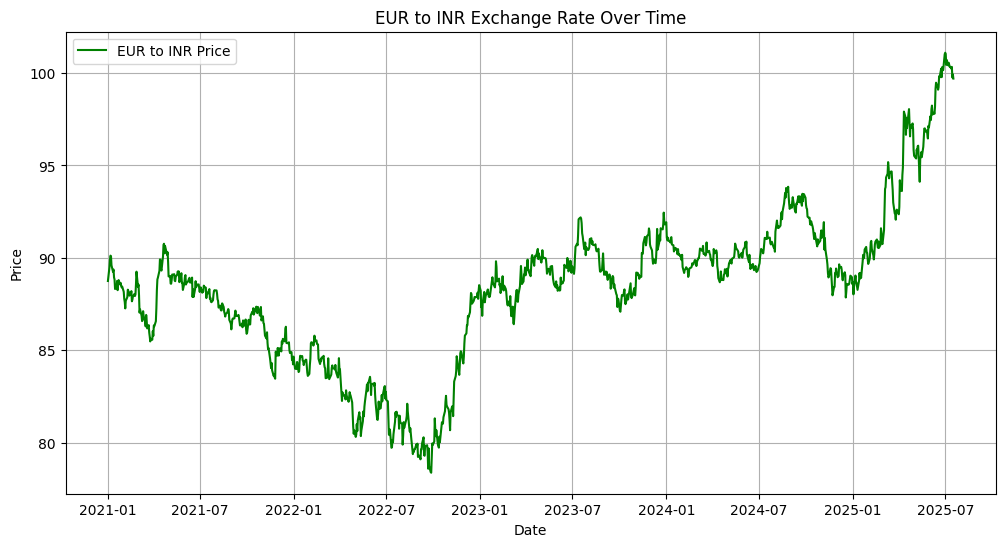

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Price'], label='EUR to INR Price', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('EUR to INR Exchange Rate Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on historical data for evaluation
history_forecast = model.predict(df[['ds']])

# Align predicted vs actual values
y_true = df['y'].values
y_pred = history_forecast['yhat'].values

# Evaluate metrics
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print the evaluation metrics
print("\n Model Evaluation on Historical Data:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")



 Model Evaluation on Historical Data:
Mean Squared Error (MSE): 0.6281
R² Score: 0.9641


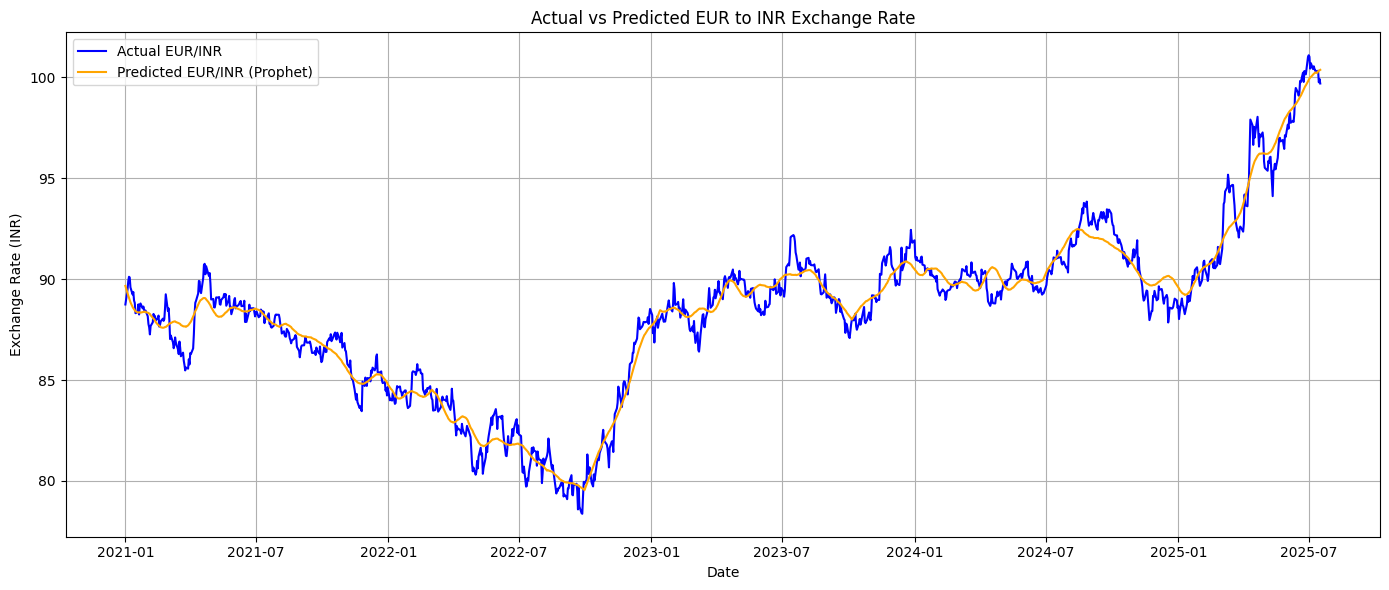

In [17]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(df['ds'], df['y'], label='Actual EUR/INR', color='blue')
plt.plot(history_forecast['ds'], history_forecast['yhat'], label='Predicted EUR/INR (Prophet)', color='orange')

plt.title('Actual vs Predicted EUR to INR Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (INR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpug392omy/55vn8yvw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpug392omy/31cckh0_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46453', 'data', 'file=/tmp/tmpug392omy/55vn8yvw.json', 'init=/tmp/tmpug392omy/31cckh0_.json', 'output', 'file=/tmp/tmpug392omy/prophet_modelhbi8tyyv/prophet_model-20250717063124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:31:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:31:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Select forecast option:
1. Forecast for next N days
2. Forecast until a specific future date (yyyy-mm-dd)
3. Forecast for a date range (from yyyy-mm-dd to yyyy-mm-dd)
Enter option number (1/2/3): 1
Enter number of days to forecast: 25

Forecasted EUR to INR:
             ds        yhat  yhat_lower  yhat_upper
1186 2025-07-18  100.373102   99.364061  101.372225
1187 2025-07-19   98.026735   97.096301   99.094184
1188 2025-07-20  100.369798   99.380439  101.369616
1189 2025-07-21  100.459262   99.447000  101.454586
1190 2025-07-22  100.494674   99.554824  101.544827
1191 2025-07-23  100.535664   99.556513  101.559764
1192 2025-07-24  100.576457   99.552780  101.594500
1193 2025-07-25  100.590865   99.527136  101.619274
1194 2025-07-26   98.262086   97.241195   99.348500
1195 2025-07-27  100.622075   99.606625  101.646247
1196 2025-07-28  100.727097   99.678949  101.738042
1197 2025-07-29  100.776027   99.671818  101.769668
1198 2025-07-30  100.827877   99.743244  101.843695
1199 2025-07-

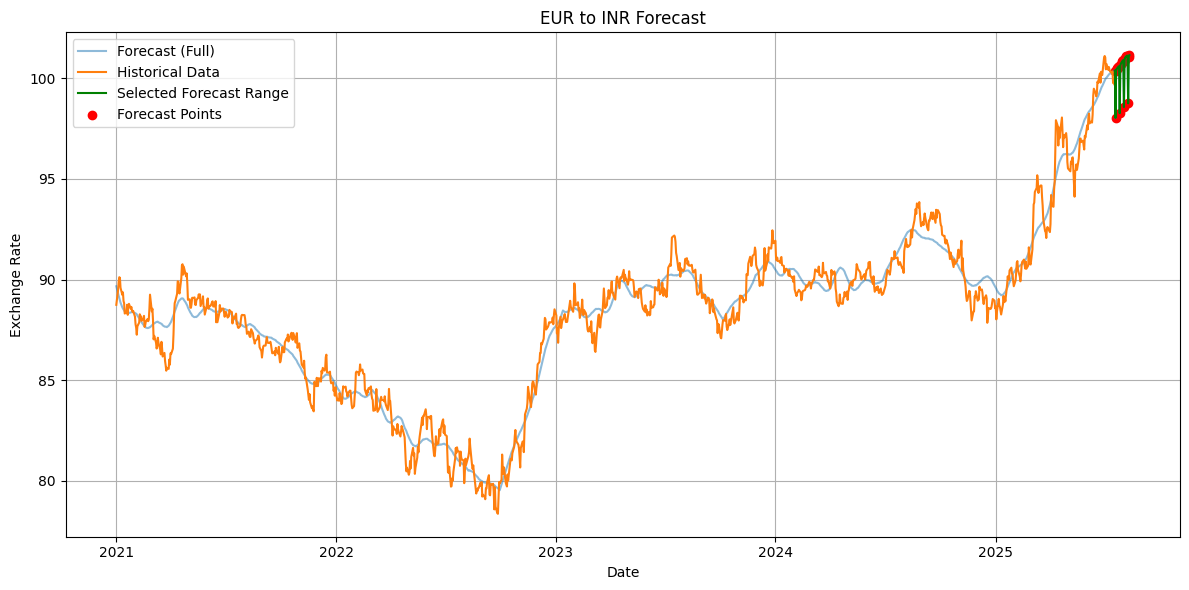

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from datetime import datetime, timedelta

# Load and preprocess data
df = pd.read_csv('/content/EUR_INR Historical Data.csv')
df = df.rename(columns={"Date": "ds", "Price": "y"})
df['ds'] = pd.to_datetime(df['ds'])
df = df.sort_values("ds")
df['y'] = df['y'].astype(str).str.replace(',', '').astype(float)

# Fit Prophet model
model = Prophet()
model.fit(df)

# User Options
print("Select forecast option:")
print("1. Forecast for next N days")
print("2. Forecast until a specific future date (yyyy-mm-dd)")
print("3. Forecast for a date range (from yyyy-mm-dd to yyyy-mm-dd)")

option = input("Enter option number (1/2/3): ")

if option == "1":
    days = int(input("Enter number of days to forecast: "))
    future = model.make_future_dataframe(periods=days)
    forecast = model.predict(future)
    forecast_range = forecast.tail(days)

elif option == "2":
    end_date = input("Enter end date (yyyy-mm-dd): ")
    today = df['ds'].max()
    days = (pd.to_datetime(end_date) - today).days
    future = model.make_future_dataframe(periods=days)
    forecast = model.predict(future)
    forecast_range = forecast[forecast['ds'] > today]

elif option == "3":
    start_date = pd.to_datetime(input("Enter start date (yyyy-mm-dd): "))
    end_date = pd.to_datetime(input("Enter end date (yyyy-mm-dd): "))
    today = df['ds'].max()
    days = (end_date - today).days
    future = model.make_future_dataframe(periods=days)
    forecast = model.predict(future)
    forecast_range = forecast[(forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)]

else:
    print("Invalid option.")
    exit()

# Display forecast data
print("\nForecasted EUR to INR:")
print(forecast_range[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Plot with indications
plt.figure(figsize=(12, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast (Full)', alpha=0.5)
plt.plot(df['ds'], df['y'], label='Historical Data')
plt.plot(forecast_range['ds'], forecast_range['yhat'], label='Selected Forecast Range', color='green')
plt.scatter(forecast_range['ds'], forecast_range['yhat'], color='red', label='Forecast Points')
plt.title("EUR to INR Forecast")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
